# List 2, variant 15 - Tobiasz Wojnar
### Digital Signal Processing 2024/25
### University of Bielsko-Biala, semestr 1

## Task
Generate three sine signals of given $f_1$, $f_2$, and $f_3$ and amplitude $|x[k]|_{max}$ for the sampling frequency fs in the range of $0 ≤ k < N$.

Plot:
1. the "normalized" level of the DFT spectra. 
2. the window DTFT spectra normalized to their mainlobe maximum. The intervals for $f$, $\Omega$, and amplitudes should be chosen by yourself for the best interpretation purposes.

Interpret the results of the figures obtained regarding the best and worst case for the different windows. Why do the results for the signals with frequencies $f_1$ and $_2$ differ?

Data (Variant 15):
- $f_1 = 500$
- $f_2 = 500.25$
- $f_3 = 499.75$
- $|x[k]|_{max} = 4$
- $f_s = 800$
- $N = 2000$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [2]:
f1 = 500    # Hz
f2 = 500.25 # Hz
f3 = 499.75 # Hz
fs = 800 # Hz
N = 1600
k  = np.arange (N)
max_amplitude = 4

x1 = np.sin(2*np.pi * f1 / fs * k )*max_amplitude
x2 = np.sin(2*np.pi * f2 / fs * k )*max_amplitude
x3 = np.sin(2*np.pi * f3 / fs * k )*max_amplitude

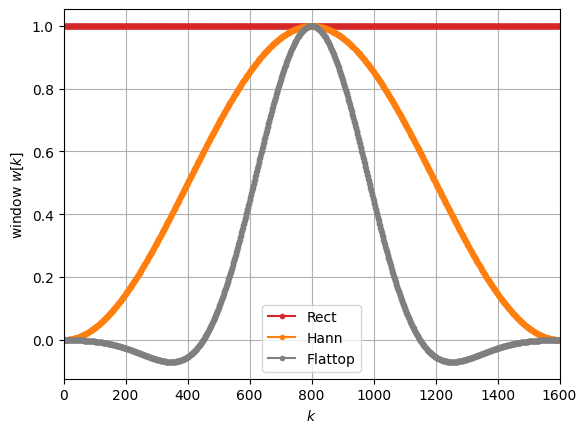

In [3]:
#Generate window functions
w_rect = np.ones(N)
w_hann = hann(N, sym=False)
w_flattop = flattop(N, sym=False)

plt.plot(w_rect, 'C3o-', ms=3, label='Rect')
plt.plot(w_hann, 'C1o-', ms=3, label='Hann')
plt.plot(w_flattop, 'C7o-', ms=3, label='Flattop')
plt.xlabel('$k$')
plt.ylabel('window $w[k]$')
plt.xlim(0,N)
plt.legend()
plt.grid()

In [4]:
x1_w_rect = fft(x1 * w_rect)
x1_w_hann = fft(x1 * w_hann)
x1_w_flattop = fft(x1 * w_flattop)

x2_w_rect = fft(x2 * w_rect)
x2_w_hann = fft(x2 * w_hann)
x2_w_flattop = fft(x2 * w_flattop)

x3_w_rect = fft(x3 * w_rect)
x3_w_hann = fft(x3 * w_hann)
x3_w_flattop = fft(x3 * w_flattop)

In [5]:
def fft2db(X):
    N = X.size
    Xtmp = 2/N *X
    Xtmp [ 0 ] *= 1/2
    if N % 2 == 0 :
        Xtmp [N//2] = Xtmp [N//2] /2
    return 20*np.log10(np.abs(Xtmp))

In [6]:
df = fs/N
f = np.arange(N)*df

In [7]:
def plotComparison(x_1, x_2, x_3, window_name,plotNr):
    plt.subplot( 3, 1, plotNr)
    
    plt.plot(f, fft2db(x_1), 'C2o-', ms=3, label=f'f1 case {window_name}')
    plt.plot(f, fft2db(x_2), 'C3o-', ms=3, label=f'f2 case {window_name}')
    plt.plot(f, fft2db(x_3), 'C5o-', ms=3, label=f'f3 case {window_name}')
    plt.xlim(275,275+50)
    plt.ylim(-50,20)   
    
    plt.xticks(np.arange(275,275+50,5))
    plt.yticks(np.arange(-60,20,10))
             
    plt.xlabel('f/Hz')
    plt.ylabel('A / dB')
    
    plt.legend()
    plt.grid()

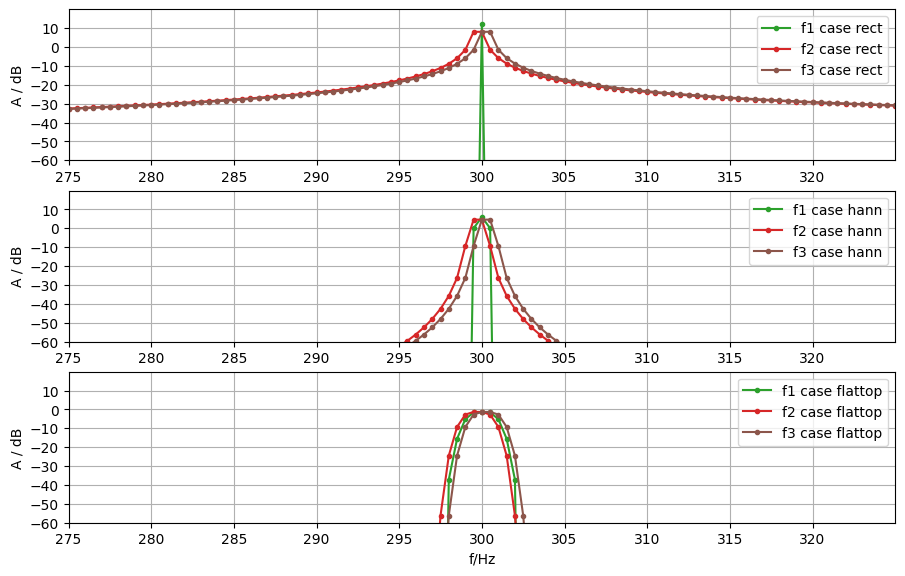

In [8]:

plt.figure(figsize=(16/1.5, 10/1.5))
plotComparison(x1_w_rect,x2_w_rect,x3_w_rect,'rect',1)
plotComparison(x1_w_hann,x2_w_hann,x3_w_hann,'hann',2)
plotComparison(x1_w_flattop,x2_w_flattop,x3_w_flattop,'flattop',3)

# We can see that f2 and f3 have when transform return the same values

In [139]:
def winDTFTdB(w):
    N  = w.size
    Nz = 100*N
    W  = np.zeros(Nz)
    
    W[0:N] = w
    W  = np.abs( fftshift (fft(W)) )
    W /= np.max(W) # normalize
    
    W = 20*np.log10(W)
    Omega = 2*np.pi/Nz*np. arange(Nz) - np.pi
    return Omega, W

/tmp/ipykernel_332/226293270.py:10: RuntimeWarning: divide by zero encountered in log10
  W = 20*np.log10(W)


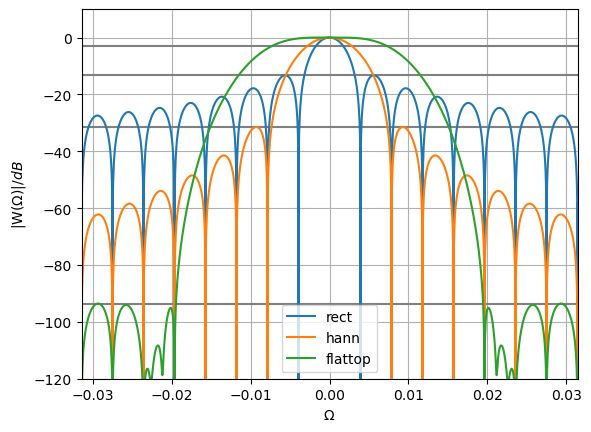

In [140]:
plt.plot([-np.pi,+np.pi], [-3.01,-3.01],'gray')
plt.plot([-np.pi,+np.pi], [-13.3,-13.3],'gray')
plt.plot([-np.pi,+np.pi], [-31.5,-31.5],'gray')
plt.plot([-np.pi,+np.pi], [-93.6,-93.6],'gray')

Omega, W = winDTFTdB(w_rect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(w_hann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(w_flattop)
plt.plot(Omega, W, label='flattop')

# plt.xlim(-np.pi,np.pi)
plt.xlim(-np.pi/100,np.pi/100) # zoom into mainlobe
plt.ylim(-120,10)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega)| / dB$')

plt.legend()
plt.grid(True)